# Laboratory 2.4: Linear Regression contd.

In this practice you will extend your Linear Regression code to a more general case. Here you will need the `synthetic_dataset.csv` present in the .zip file you downloaded alongside this notebook.

In addition, we will be using the following libraries:
- Data management:
    - [numpy](https://numpy.org/)
    - [pandas](https://pandas.pydata.org/)
    - [scipy](https://scipy.org/)
- Modelling:
    - [scikit-learn](https://scikit-learn.org)
- Plotting:
    - [seaborn](https://seaborn.pydata.org/)
    - [matplotlib](https://matplotlib.org/)
    
### **All the things you need to do are marked by a "TODO" comment nearby. Make sure you *read carefully everything before working* and solve each point before submitting your solution.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import os
import sys
# Get the absolute path of the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add it to sys.path
sys.path.insert(0, project_root)



### Custom Linear Regression model

You are going to be working with the following class that you already know from the previous practice, so feel free to recycle as much code as you want (or can). In this case, you will be enhancing its functionalities, getting a more general function than the one you implemented before. 

**For now, just continue with the practice and do not fill anything, you will come back later to fill the gaps.**

In [126]:
from src.Lab_2_4_LR2 import LinearRegressor


**Data**: Remember, from the previous lab session, we had the following univariate dataset:

In [127]:
# Define data to use in this practice
x = np.array([0, 3, 2, 1, 4, 6, 7, 8, 9, 10])
y = np.array([2, 3, 2, 4, 5, 7, 9, 9, 10, 13])

Use the code *you wrote* from the previous practice (not the sklearn version) to fit the data in the following cell

In [128]:
linreg = LinearRegressor()
linreg.fit(x, y)

Before we get into the things you'll do today, let's construct a function that provides the values for the $R^2$, RMSE and MAE. For this, the inputs of this function are the true $y$ values and the predicted $\hat{y}$ values

In [129]:
from src.Lab_2_4_LR2 import evaluate_regression

In [130]:
# Obtain regression performance metrics
y_pred = linreg.predict(x)
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)

{'R2': 0.9201359388275276, 'RMSE': 1.0126472956832233, 'MAE': 0.8945454545454552}


## Polynomial regression

In the previous practice, you have trained a model assuming that the relationship between input and output is linear. However, in most real cases this is not common and the relationship between input and output is not linear. In this section, we are going to learn how to deal with non-linear relationships when using linear models. Read `synthetic_dataset.csv` and train a linear regression model. 

*The target variable is the last column of the dataset*

In [131]:
data = pd.read_csv("../data/synthetic_dataset.csv")
print(data)
# TODO: Obtain inputs and output from data
X = np.array(data.iloc[:, :4])
print(X)
y = np.array(data.iloc[:, 4])
print(y)

        Input1    Input2    Input3    Input4     Output
0     1.764052 -0.202117  0.330046  0.371232   6.788989
1     0.400157 -0.833231 -0.000480  0.304784   2.972974
2     0.978738  1.733600  0.818116  0.504125   7.089140
3     2.240893  0.190649  0.428214  0.135300  11.170032
4     1.867558 -0.177810 -2.503947  0.653759   8.199762
...        ...       ...       ...       ...        ...
9995 -1.809282  0.271662 -0.400898 -1.457199   4.251336
9996  0.042359 -0.108997 -0.585452  2.011115   4.873215
9997  0.516872 -0.057259 -1.511276  1.689858   5.574173
9998 -0.032921 -1.058931  0.976844  0.199966   3.842855
9999  1.298111 -0.326528  1.255501 -1.224331   1.955963

[10000 rows x 5 columns]
[[ 1.76405235e+00 -2.02117027e-01  3.30045889e-01  3.71232144e-01]
 [ 4.00157208e-01 -8.33231001e-01 -4.79979434e-04  3.04783891e-01]
 [ 9.78737984e-01  1.73360025e+00  8.18115898e-01  5.04124602e-01]
 ...
 [ 5.16872179e-01 -5.72592527e-02 -1.51127631e+00  1.68985759e+00]
 [-3.29206931e-02 -1.05893126

In this case we will skip the preprocessing and go straight to the modelling phase. Therefore, fit the model here.

In [132]:
# TODO: Train linear regression model
linreg = LinearRegressor()
linreg.fit(X, y)


In [133]:
# TODO: Obtain and print the regression performance metrics
#nuestra funcion predict funciona con la X ya añadiendo la columna de unos
X_with_bias = np.insert(
            X, 0, 1, axis=1
        ) 
X=X_with_bias
y_pred = linreg.predict(X)
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)

{'R2': 0.5452814241832913, 'RMSE': 3.1936452748702813, 'MAE': 2.2373945210247843}


If you trained the model well, the $R^2$ metric will be terrible, in the order of $0.5$. **What happened here?** Let's try to clear this via the *study of the residuals*.

Create a function to plot the residuals of the model. This function shall:
- Create a **histogram** of the residuals.
- Create a **Q-Q plot** of the residuals.
- Create a **scatterplot of the residuals against each input variable, the true output variable and the predictions**.

**Why do we want to check the residuals this way?** 

> Para detectar si el modelo está capturando bien la relación en los datos o si hay patrones  en los errores.

In [ ]:
def plot_residuals(data, output_column, prediction_column):
    """
    Plot residuals of a model against all variables in the DataFrame, using box plots for
    categorical variables and scatter plots for continuous variables. Additionally, plot
    a histogram and a QQ-plot of the residuals.

    Args:
        data (pd.DataFrame): The DataFrame containing the data.
        output_column (str): The name of the output column.
        prediction_column (str): The name of the prediction column.
    """
    # TODO: Calculate residuals
    residuals = y - y_pred
    
    num_features = len(data.columns) - 2  # Exclude output and prediction columns
    

    # Determine the number of rows and columns for subplots
    num_rows = int(np.ceil(np.sqrt(num_features + 4)))  # Add 4 for histogram, Q-Q plot, true output vs residuals, and predictions vs residuals
    num_cols = int(np.ceil((num_features + 4) / num_rows))

    # Plot histogram of residuals
    plt.figure(figsize=(5 * num_cols, 4 * num_rows))
    plt.subplot(num_rows, num_cols, 1)
    plt.hist(residuals, bins=30, edgecolor='black')
    plt.title('Histogram of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')

    # TODO: Plot Q-Q plot of residuals (tip: use stats.probplot from scipy)
    plt.subplot(num_rows, num_cols, 2)
    stats.probplot(residuals, dist="norm", plot=plt)# Fill the code here
    plt.title('Q-Q Plot of Residuals')

    # TODO: Plot residuals against output variable
    plt.subplot(num_rows, num_cols, 3)
    plt.scatter(residuals, y, alpha=0.5)     # Fill the code here
    plt.title('Residuals vs True Output')
    plt.xlabel('True Output')
    plt.ylabel('Residuals')

    # Plot residuals against prediction variable
    plt.subplot(num_rows, num_cols, 4)
    plt.scatter(data[prediction_column], residuals, alpha=0.5)   # Use this as example for later
    plt.title('Residuals vs Predictions')
    plt.xlabel('Predictions')
    plt.ylabel('Residuals')

    # TODO: Plot residuals against each input variable
    for i, col in enumerate(data.columns):
        if col not in [output_column, prediction_column]:
            plt.subplot(num_rows, num_cols, i + 5)
            plt.scatter(data[col],residuals , alpha=0.5)   # Fill the code here
            plt.title(f'Residuals vs {col}')
            plt.xlabel(col)
            plt.ylabel('Residuals')

    plt.tight_layout()
    plt.show()

Now, **print the coefficients** of the model **alongside the plots** you can generate with the previous function

Coefficients of the model: {'Coeficiente_0': -0.0019118098357402014, 'Coeficiente_1': -0.00598029466183541, 'Coeficiente_2': 1.630324001991256, 'Coeficiente_3': 3.059308730603962}


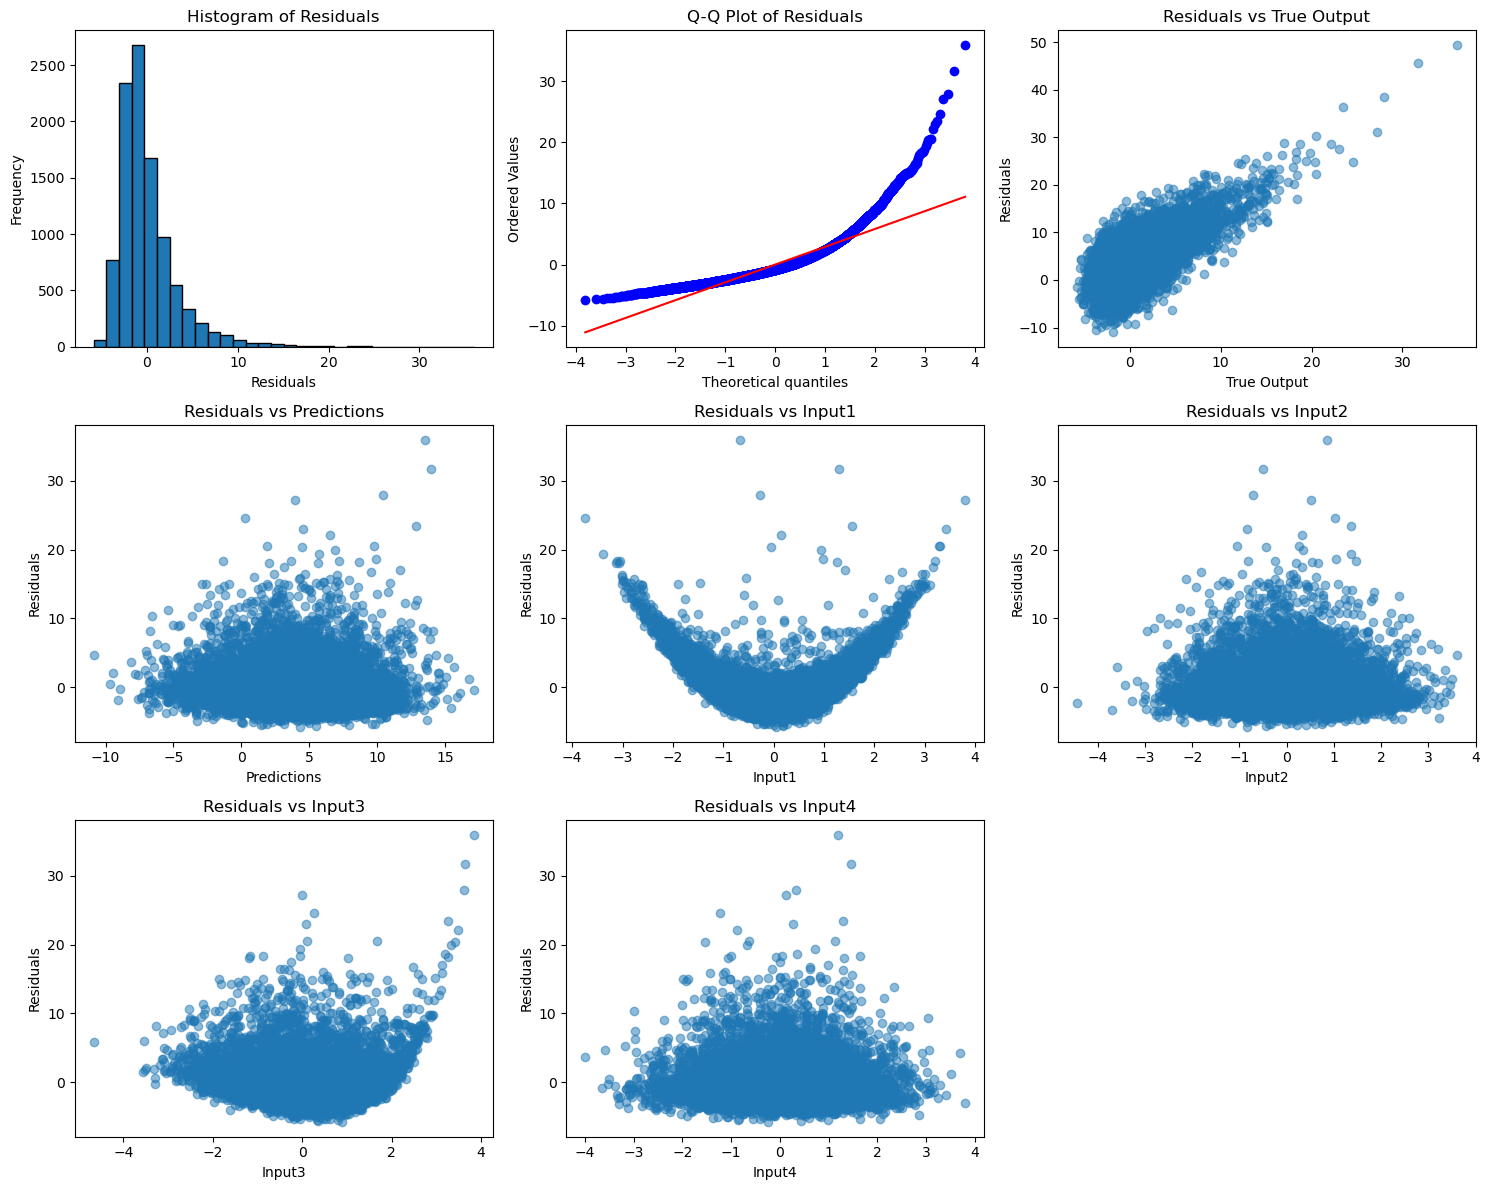

In [ ]:
# TODO:  First, construct a dictionary of the coefficients to print them
coeficientes=linreg.coefficients
intercepto=linreg.intercept

# Construir el diccionario de coeficientes
coef_dict = {f"Coeficiente_{i}": coef for i, coef in enumerate(coeficientes)}

print(f"Coefficients of the model: {coef_dict}")




# Plot the residuals for the predictions
data["Predictions"] = linreg.predict(X)
plot_residuals(data, 'Output', 'Predictions')

**What are we seeing here? Is there any way to improve the model?**
Los residuos muestran patrones de no linealidad y posible influencia de outliers. Se podría mejorar con regresión polinomial o modelos más flexibles

As you may expect, you should see some higher-order contribution to the behavior of the data, since some of the residuals have clear structures. In particular, `Input1` has a higher-order polynomial contribution (*which order do you think?*), while `Input2` has an *exponential* form. 

In order to fit a regression model with these contributions, construct a new dataframe where each column corresponds to the desired manipulation of each variable. Then, fit the regression model and see the results.

* Also, pay attention to the fact that you can use whatever contribution you see fit here, not just these previous ones.

In [ ]:
# TODO

input1=data["Input1"]
input2=data["Input2"]
input3=data["Input3"]
input4=data["Input4"]
output=data["Output"]
data_transf = pd.DataFrame({'Input1': input1 ** 2,   # Substitute "None" by the degree you think works here
                            'Input2': np.exp(input3), 
                            'Input3': input4,
                            'Output': output})
X_transf = data_transf.iloc[:,:3].values


# Train linear regression model
linreg = LinearRegressor()
linreg.fit(X_transf, y)

# Evaluate the metrics to see the behavior
X_with_bias = np.insert(
            X_transf, 0, 1, axis=1
        ) 
X_transf=X_with_bias




y_pred = linreg.predict(X_transf)
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)

{'R2': 0.9557524745534756, 'RMSE': 0.9962304737909358, 'MAE': 0.7956340344398113}


Now, print again the coefficients for the model and plot the residuals as you did before.

**What do you observe?**
Se ha mejorado significativamente el modelo. R2 ha subido por lo que ahora el modelo explica mejor la variabilidad de los datos. RMSE y MAE han disminuido, lo que significa un menor error medio

Coefficients of the model: {'Input1': 1.9985407741302759, 'Input2': 0.9951259300218519, 'Input3': 2.988069929362549}


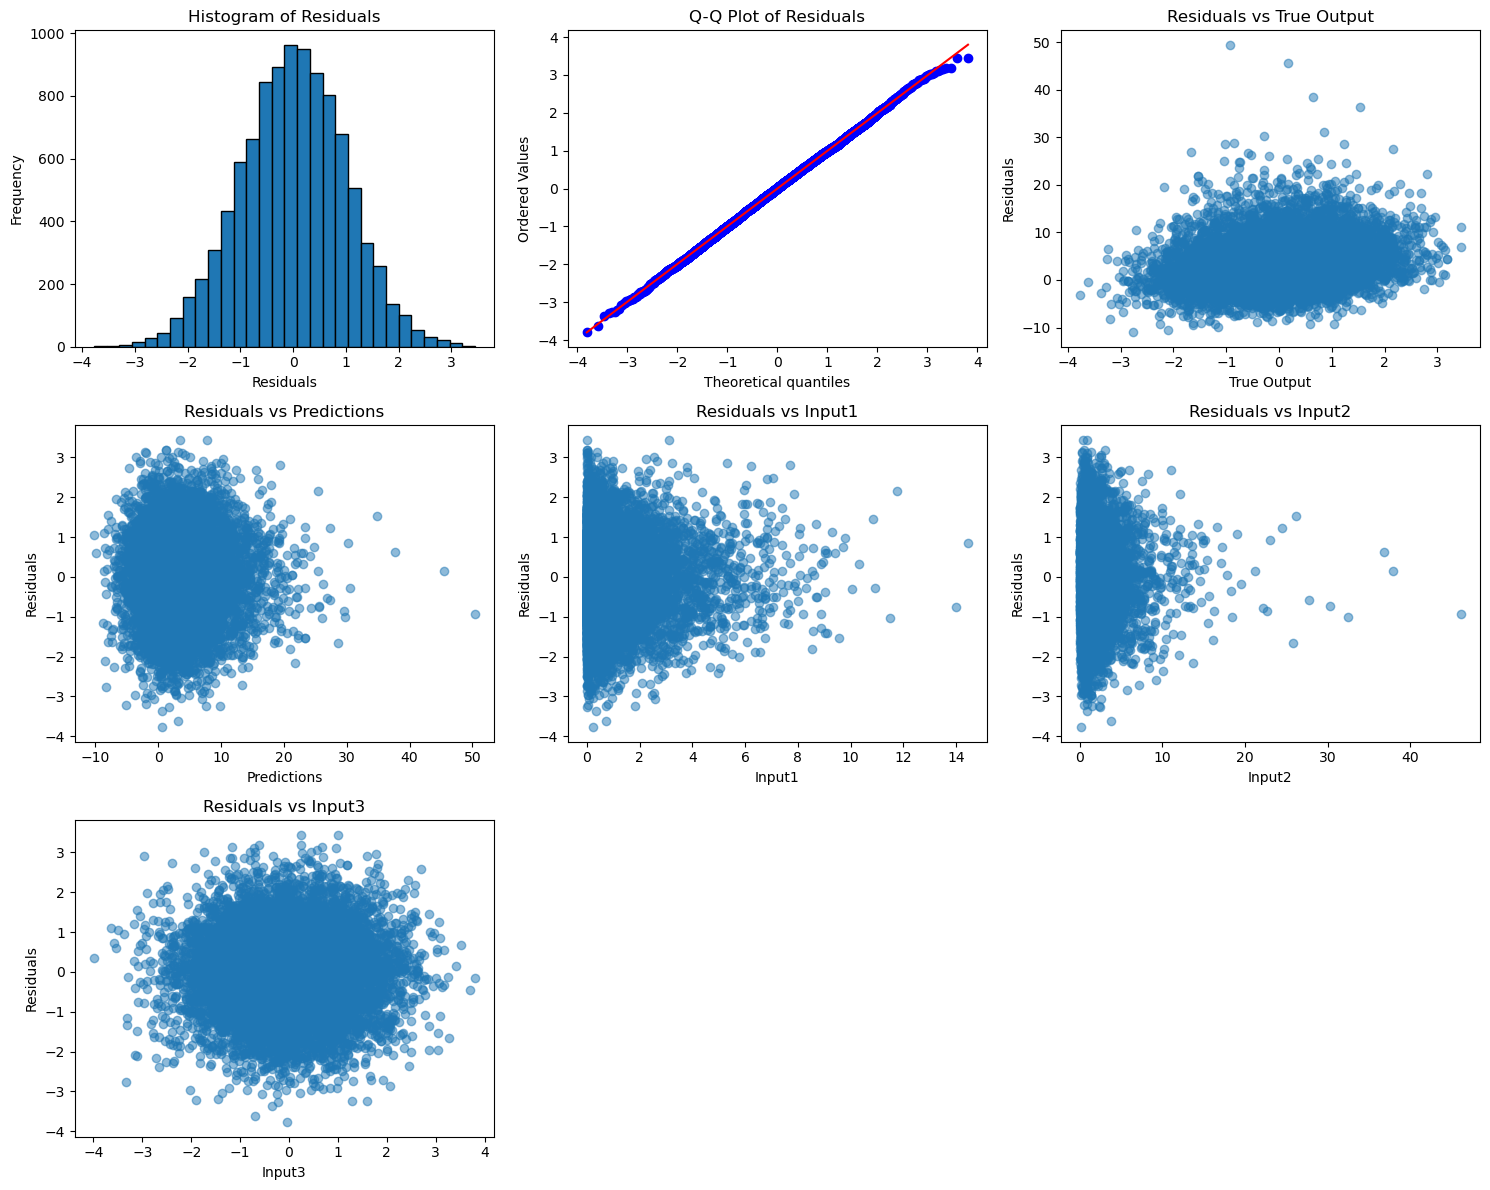

In [ ]:
coef_dict = {'Input' + str(i+1): coef for i, coef in enumerate(linreg.coefficients)}
print(f"Coefficients of the model: {coef_dict}")


data_transf["Predictions"] = linreg.predict(X_with_bias)
plot_residuals(data_transf, 'Output', 'Predictions')

## Categorical variables

Linear regression, as is, can not deal with categorical variables. Therefore, we need to encode the variables when preprocessing the data. Complete the one-hot-encode function below. Take into account that strings shall be treated automatically as categorical variables.
<center>

![Image](https://miro.medium.com/v2/resize:fit:1358/1*ggtP4a5YaRx6l09KQaYOnw.png)

</center>

In [138]:
from src.Lab_2_4_LR2 import one_hot_encode

We will use this in a usual dataset from the internet. If everything is well, you should be able to run the following code as-is.

In [139]:
# Load the dataset
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
data = pd.read_csv(url)


y = data['charges'].values
X = data.drop(columns=['charges']).values

# Preprocess the data
# Identify categorical columns for one-hot encoding
categorical_columns = [data.columns.get_loc(col) for col in ['sex', 'smoker', 'region']]
#las columnas cateogorcias son estas
print(categorical_columns)


# One-hot encode categorical variables
X_encoded = one_hot_encode(X, categorical_columns, drop_first=True)
print(X_encoded)
X_encoded = X_encoded.astype(float)                                  # Watch out for this!

# Instantiate and fit the LinearRegressor
model = LinearRegressor()
model.fit(X_encoded, y)


X_encoded_with_bias = np.insert(
            X_encoded, 0, 1, axis=1
        ) 
# Predict and evaluate
y_pred = model.predict(X_encoded_with_bias)
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)

[1, 4, 5]
[[19 0 27.9 ... 0 0 1]
 [18 1 33.77 ... 0 1 0]
 [28 1 33.0 ... 0 1 0]
 ...
 [18 0 36.85 ... 0 1 0]
 [21 0 25.8 ... 0 0 1]
 [61 0 29.07 ... 1 0 0]]
{'R2': 0.7509130345985207, 'RMSE': 6041.6796511744515, 'MAE': 4170.886894163565}


In [140]:
# Ver las primeras filas del dataset
print(data.head())

# Ver las columnas y tipos de datos
print(data.dtypes)

# Ver valores únicos en columnas categóricas
for col in ['sex', 'smoker', 'region']:
    print(f"Valores únicos en {col}: {data[col].unique()}")


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
Valores únicos en sex: ['female' 'male']
Valores únicos en smoker: ['yes' 'no']
Valores únicos en region: ['southwest' 'southeast' 'northwest' 'northeast']


Compare yourself with scikit

In [141]:
from sklearn.linear_model import LinearRegression

# Load the dataset
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
data = pd.read_csv(url)

# Preprocess the data
# TODO: One-hot encode categorical variables. Use pd.get_dummies()
data_encoded = pd.get_dummies(data,drop_first=True) 

# Split the data into features (X) and target (y)
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

# Instantiate the LinearRegression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X, y)

# Make predictions on the test data
y_pred = model.predict(X)

# Evaluate the model
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)


{'R2': 0.7509130345985207, 'RMSE': 6041.6796511744515, 'MAE': 4170.886894163585}


In [142]:
X

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,True,False,True,False,False
1334,18,31.920,0,False,False,False,False,False
1335,18,36.850,0,False,False,False,True,False
1336,21,25.800,0,False,False,False,False,True


### Colored residuals

Now that we have categorical variables, the relationship between inputs and outputs might differ for different levels of the categorical variables. Therefore, you will modify the `plot_residuals` function to **color the scatter plots based on the value of a specific categorical variable**.

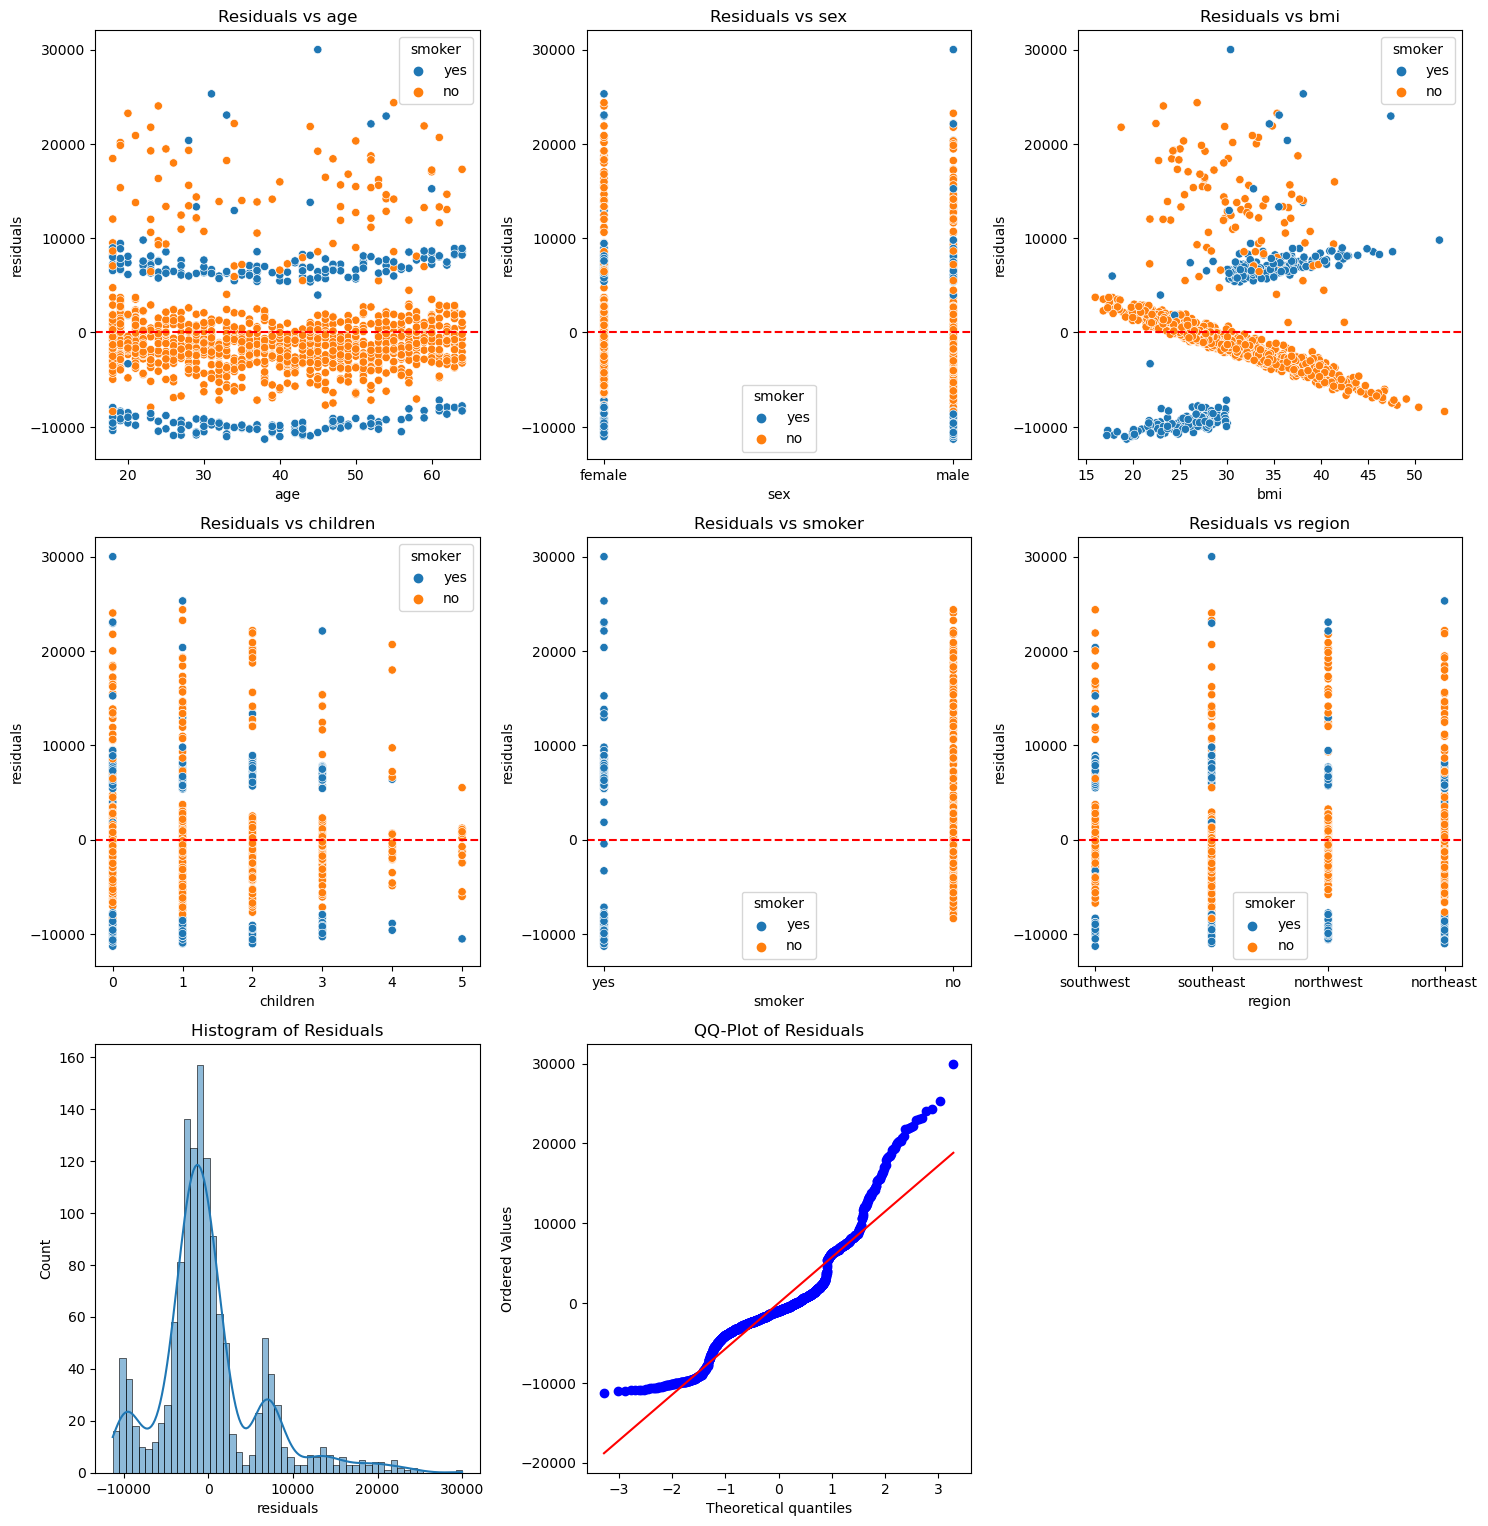

In [143]:
def plot_residuals(data, output_column, prediction_column, categorical_var=None):
    """
    Plot residuals of a model against all variables in the DataFrame. Additionally, plot
    a histogram and a QQ-plot of the residuals.

    Args:
        data (pd.DataFrame): The DataFrame containing the data.
        output_column (str): The name of the output column.
        prediction_column (str): The name of the prediction column.
        categorical_var (str, optional): The name of a categorical variable for coloring. Defaults to None.
    """
    # TODO: As before, calculate residuals
    data['residuals'] = data[output_column] - data[prediction_column]
 

    # Identify columns to plot (excluding the output and prediction columns)
    columns_to_plot = [col for col in data.columns if col not in [output_column, prediction_column, 'residuals']]

    # Number of rows and columns for the subplot
    n_cols = 3
    n_rows = int(len(columns_to_plot) / n_cols) + 2  # Additional row for histogram and QQ-plot

    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

     # TODO: Plot each variable against the residuals
    for i, col in enumerate(columns_to_plot):
        ax = axes[i]
        
        if categorical_var and categorical_var in data.columns:
            sns.scatterplot(x = data[col], y = data['residuals'], data=data, ax=ax ,hue = data[categorical_var])
        else:
            sns.scatterplot(x = data[col], y = data['residuals'], data=data, ax=ax)
        
        ax.set_title(f'Residuals vs {col}')
        ax.axhline(0, ls='--', color='r')

    # Histogram of residuals
    sns.histplot(data['residuals'], kde=True, ax=axes[i + 1])
    axes[i + 1].set_title('Histogram of Residuals')

    # QQ-plot of residuals
    stats.probplot(data['residuals'], dist="norm", plot=axes[i + 2])
    axes[i + 2].set_title('QQ-Plot of Residuals')

    # Hide any unused axes
    for j in range(i + 3, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

data['predictions'] = model.predict(X)
# Example usage
plot_residuals(data, 'charges', 'predictions', 'smoker')


**What's happening with the residuals?**
>Los residuals no están distribuidos aleatoriamente, mostrando patrones en las variables bmi, age y children. Esto indica wu ele modelo no captura bien la relación. La distribución de los residuals es sesgada, y se aleja de la normalidad en el qq-plot.

# _Rolling in the deep_

Following the theory taught in class, do the following:

1. **implement the gradient descent algorithm** to train the linear regression model and reproduce the results using this training method. You can find the structure for the gradient descent inside the initial linear regression function, inside the method `fit_gradient_descent`.
2. As final steps, **display the progress of the loss function by plotting the gradient descent steps on the X-axis and the loss function on the Y-axis for each step**. 
3. Additionally, **using the same representation as in the previous section where each axis represents the values of w and b, show the sequence of steps that bring you closer to the optimum each time**. Each step should be a point in space, with coordinates (w,b). Compare all the results with the optimal solution from the scikit fit coefficients.

Feel free to add as many cells as you may need from here onwards in order to fulfill these three tasks

In [156]:
print(X_encoded,type(X_encoded))

[[19.    0.   27.9  ...  0.    0.    1.  ]
 [18.    1.   33.77 ...  0.    1.    0.  ]
 [28.    1.   33.   ...  0.    1.    0.  ]
 ...
 [18.    0.   36.85 ...  0.    1.    0.  ]
 [21.    0.   25.8  ...  0.    0.    1.  ]
 [61.    0.   29.07 ...  1.    0.    0.  ]] <class 'numpy.ndarray'>


In [145]:
from src.Lab_2_4_LR2 import LinearRegressor

In [146]:
X

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,True,False,True,False,False
1334,18,31.920,0,False,False,False,False,False
1335,18,36.850,0,False,False,False,True,False
1336,21,25.800,0,False,False,False,False,True


In [158]:


print(X_encoded,type(X_encoded))

[[19.    0.   27.9  ...  0.    0.    1.  ]
 [18.    1.   33.77 ...  0.    1.    0.  ]
 [28.    1.   33.   ...  0.    1.    0.  ]
 ...
 [18.    0.   36.85 ...  0.    1.    0.  ]
 [21.    0.   25.8  ...  0.    0.    1.  ]
 [61.    0.   29.07 ...  1.    0.    0.  ]] <class 'numpy.ndarray'>


In [148]:
linreg = LinearRegressor()
linreg.fit(X_encoded, y)

In [149]:
linreg.fit(X_encoded,y,method="gradient_descent", learning_rate=0.00001,iterations=100000)
X_with_bias = np.insert(
            X, 0, 1, axis=1
        ) 
predictions = linreg.predict(X_with_bias)
evaluate_regression(y,predictions)

Epoch 0: MSE = 431689622883.2178
Epoch 1000: MSE = 174434006488.81757
Epoch 2000: MSE = 174022920690.49377
Epoch 3000: MSE = 173616675352.06454
Epoch 4000: MSE = 173212603306.1583
Epoch 5000: MSE = 172810223370.8274
Epoch 6000: MSE = 172409440529.54974
Epoch 7000: MSE = 172010228143.66953
Epoch 8000: MSE = 171612571837.46222
Epoch 9000: MSE = 171216459585.1237
Epoch 10000: MSE = 170821879955.47015
Epoch 11000: MSE = 170428821797.1352
Epoch 12000: MSE = 170037274178.2464
Epoch 13000: MSE = 169647226371.17017
Epoch 14000: MSE = 169258667845.34708
Epoch 15000: MSE = 168871588261.68408
Epoch 16000: MSE = 168485977467.347
Epoch 17000: MSE = 168101825490.7451
Epoch 18000: MSE = 167719122536.66727
Epoch 19000: MSE = 167337858981.5598
Epoch 20000: MSE = 166958025368.94012
Epoch 21000: MSE = 166579612404.9426
Epoch 22000: MSE = 166202610953.99234
Epoch 23000: MSE = 165827012034.6035
Epoch 24000: MSE = 165452806815.2981
Epoch 25000: MSE = 165079986610.64255
Epoch 26000: MSE = 164708542877.39758


{'R2': 0.2719171203505937, 'RMSE': 10329.34070598956, 'MAE': 8612.860685917065}

In [150]:
historial_loss=linreg.loss_historial
valores_w=linreg.valores_w
valores_b=linreg.valores_b

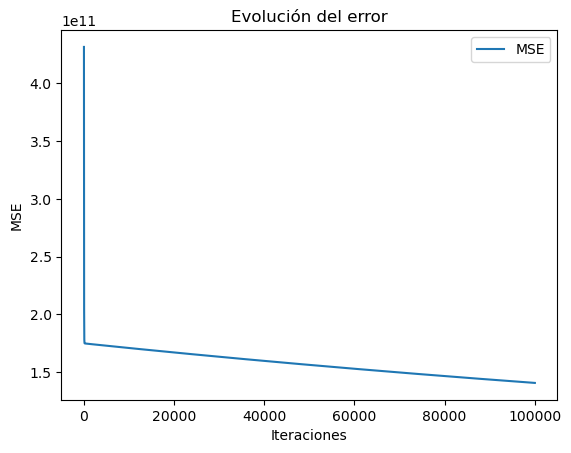

In [ ]:
# Entrenar modelo y obtener datos
loss_history, w_values, b_values = historial_loss, valores_w, valores_b

import matplotlib.pyplot as plt

plt.plot(range(len(loss_history)), loss_history, label="MSE")
plt.xlabel("Iteraciones")
plt.ylabel("MSE")
plt.title("Evolución del error")
plt.legend()
plt.show()

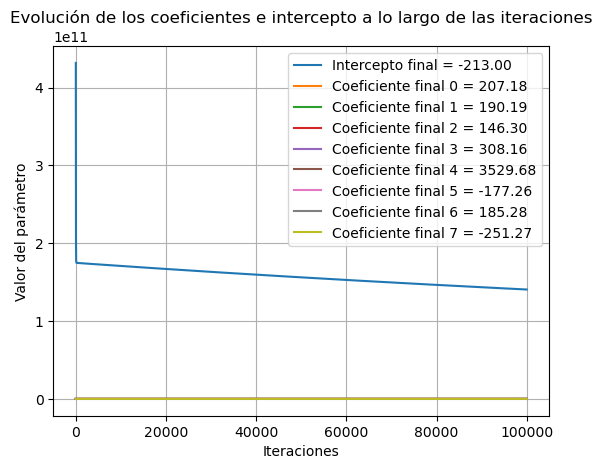

In [154]:
num_iteraciones = 100000
valores_x = np.arange(num_iteraciones)

plt.plot(valores_x, historial_loss, label=f'Intercepto final = {linreg.intercept:.2f}')

valores_parametros = np.column_stack((valores_w, valores_b))

for idx, coef in enumerate(linreg.coefficients):
    plt.plot(valores_x, valores_parametros[:, idx], label=f'Coeficiente final {idx} = {coef:.2f}')

plt.title('Evolución de los coeficientes e intercepto a lo largo de las iteraciones')
plt.xlabel('Iteraciones')
plt.ylabel('Valor del parámetro')
plt.legend()
plt.grid(True)
plt.show()

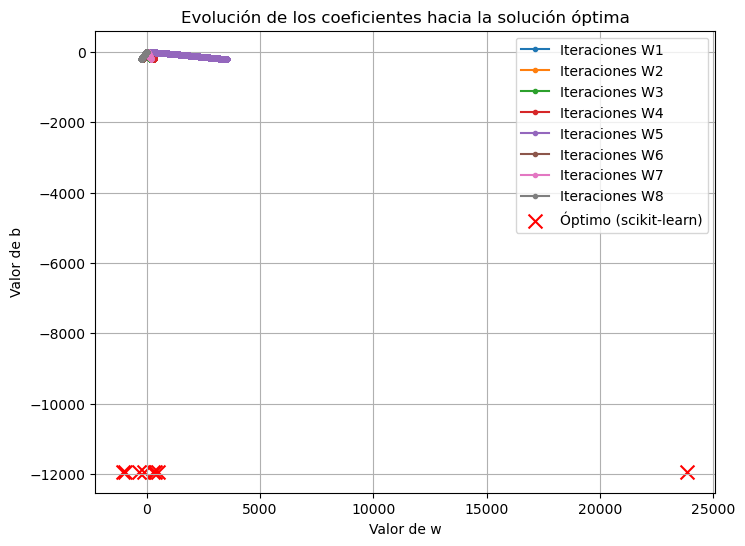

In [ ]:
from sklearn.linear_model import LinearRegression
linreg_scikit = LinearRegression()
linreg_scikit.fit(X, y)


w_historial = np.array(valores_w)
b_historial = np.array(valores_b) 



w_optimos = linreg_scikit.coef_
b_optimo = linreg_scikit.intercept_


plt.figure(figsize=(8, 6))

for i in range(w_historial.shape[1]): 
    plt.plot(w_historial[:, i], b_historial, linestyle='-', marker='o', markersize=3, label=f'Iteraciones W{i+1}')  


plt.scatter(w_optimos, [b_optimo] * len(w_optimos), color='red', marker='x', s=100, label="Óptimo (scikit-learn)")

plt.xlabel("Valor de w")
plt.ylabel("Valor de b")
plt.title("Evolución de los coeficientes hacia la solución óptima")
plt.legend()
plt.grid(True)
plt.show()